Import all the needed packages Needed for the Data exploration



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from scipy import stats

## Load the Data

Reads the data CSV file into a DataFrame using `pd.read_csv()`.

## Inspect the data
Moving on, I will Inspect teh Data  using `df.head()` to display the first 5 rows of the data set

In [8]:
# add the data to be able to do the EDS
df = pd.read_csv('../data/Churn_Modelling.csv')

# print out the first head of the data
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


## Display the data type

In this cell, its very important to show the data types with `df.dtypes`. available, in the data set.

In [9]:
# Check for the data types of each column
print("\nData types of each column:")
print(df.dtypes)


Data types of each column:
RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                float64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard          float64
IsActiveMember     float64
EstimatedSalary    float64
Exited               int64
dtype: object


# Summary of the Data
Provide a summary of the dataset using df.info().

In [10]:
# get a summary of the data set
print("\nSummary of the dataset:")
print(df.info())



Summary of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB
None


# Handle Missing Values:
Check for missing values with df.isnull().sum().

# Also drop any missing rows
Based off the number of missing values, I will decided the best way to handle the missing data

Given our data set, we only 3 rows with missing values, so i delete them from the dataset

In [11]:
# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# drop all the missing values
df = df.dropna()



Missing values in each column:
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64


In [12]:
# Descriptive statistics
print("\nDescriptive statistics for numerical columns:")
print(df.describe())


Descriptive statistics for numerical columns:
          RowNumber    CustomerId  CreditScore          Age       Tenure  \
count   9998.000000  9.998000e+03  9998.000000  9998.000000  9998.000000   
mean    5003.497499  1.569094e+07   650.529606    38.920287     5.013003   
std     2886.321275  7.192399e+04    96.633003    10.487986     2.892152   
min        1.000000  1.556570e+07   350.000000    18.000000     0.000000   
25%     2504.250000  1.562854e+07   584.000000    32.000000     3.000000   
50%     5003.500000  1.569073e+07   652.000000    37.000000     5.000000   
75%     7502.750000  1.575323e+07   718.000000    44.000000     7.000000   
max    10000.000000  1.581569e+07   850.000000    92.000000    10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count    9998.000000    9998.000000  9998.000000     9998.000000   
mean    76481.490819       1.530206     0.705541        0.514803   
std     62393.187035       0.581669     0.455822        0.499806

In [13]:
print("\nOverview of categorical columns:")
print(df.describe(include=['O']))


Overview of categorical columns:
       Surname Geography Gender
count     9998      9998   9998
unique    2932         3      2
top      Smith    France   Male
freq        32      5012   5455


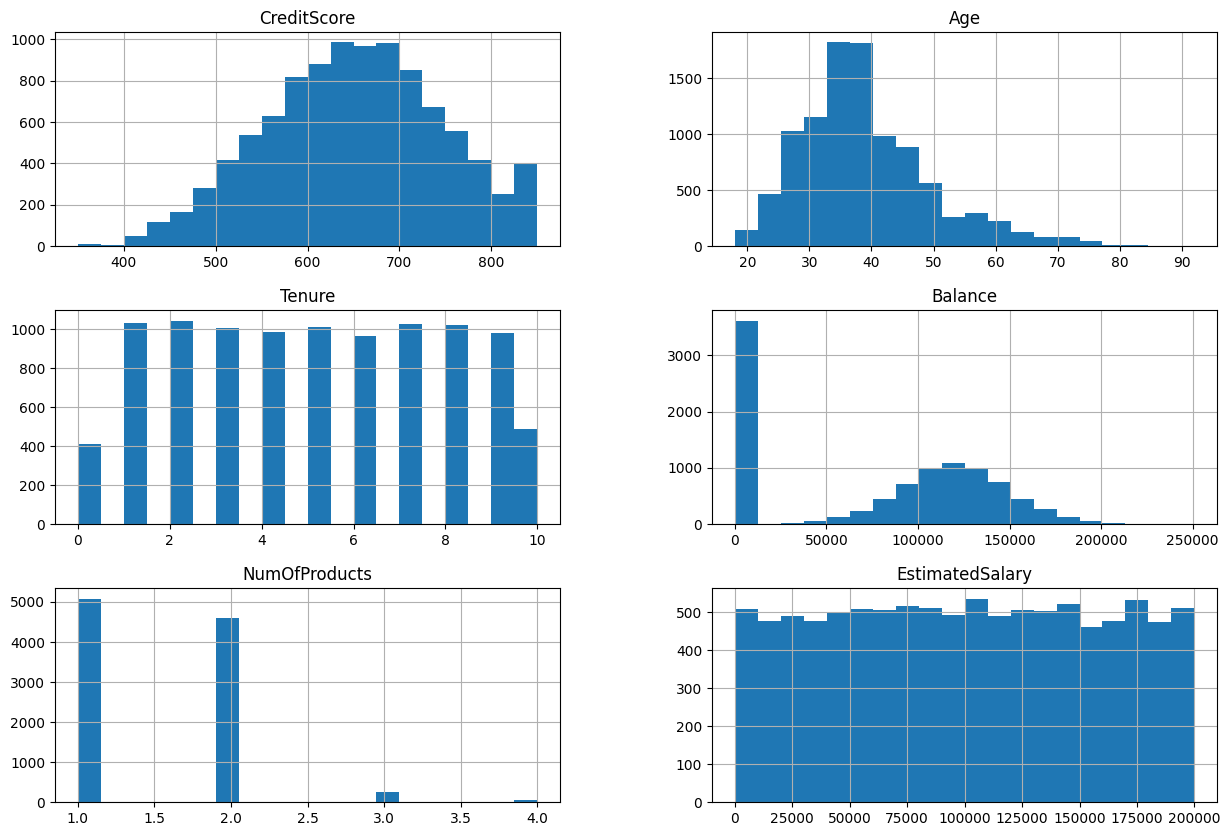

In [14]:
# Visualize distributions of numerical features
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
df[numerical_features].hist(bins=20, figsize=(15, 10))
plt.show()

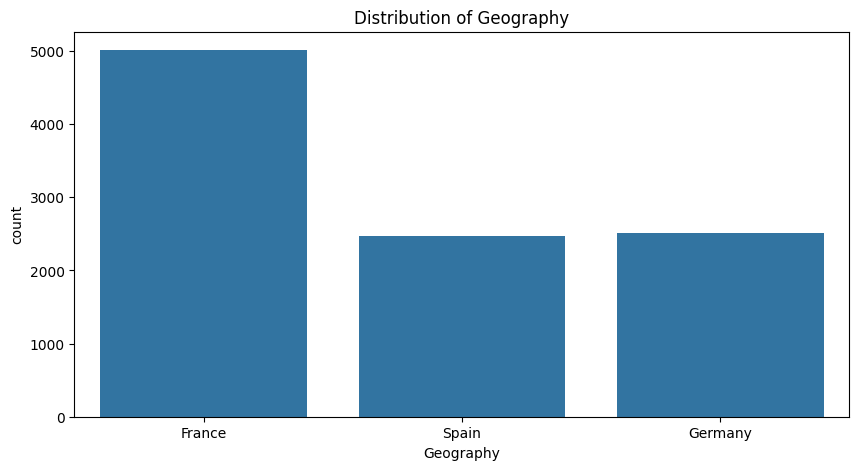

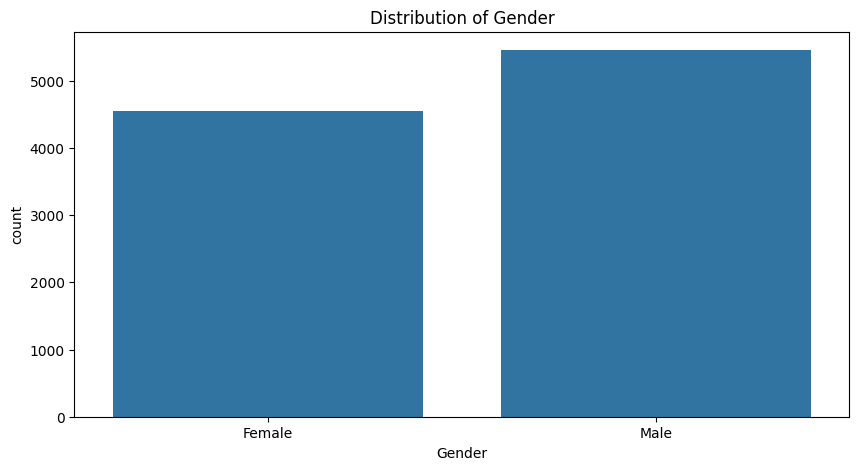

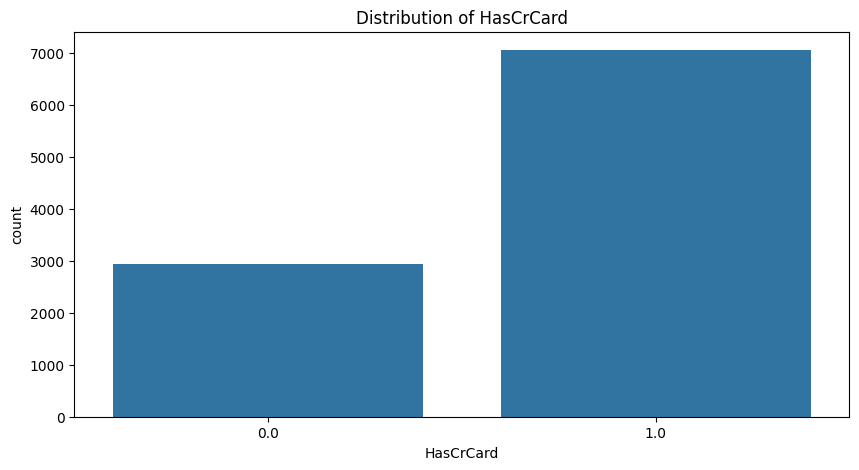

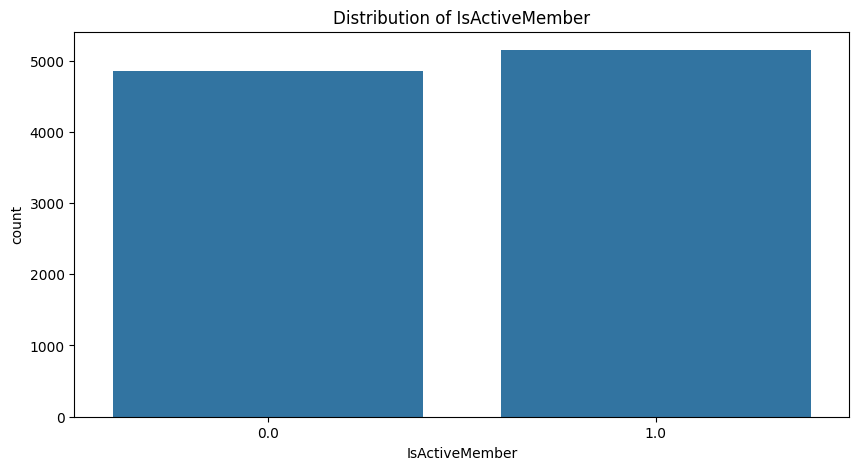

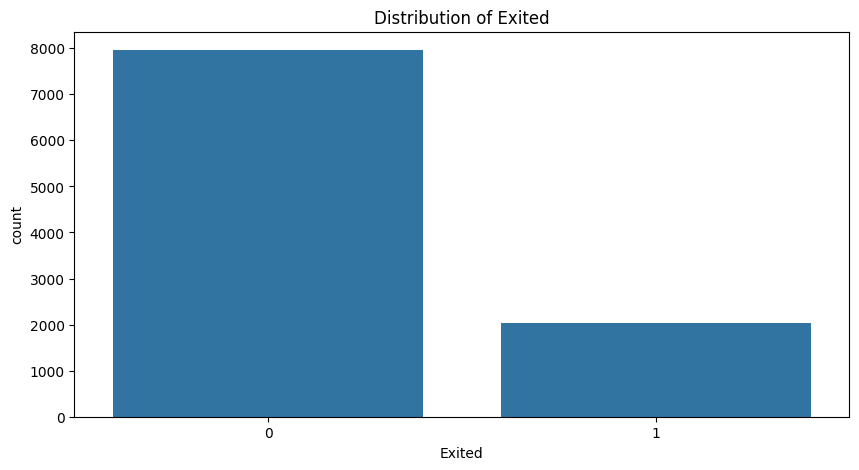

In [15]:
# Visualize distribution of categorical features
categorical_features = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Exited']
for col in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.show()


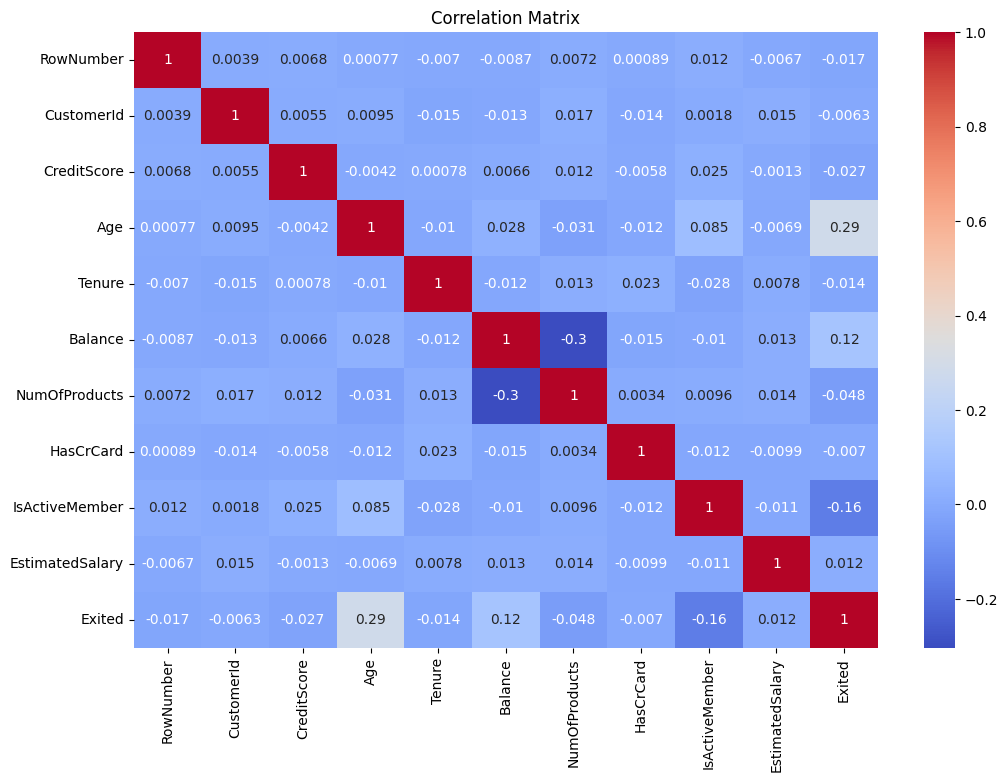

In [16]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
corr_matrix = df.drop(['Surname', 'Geography', 'Gender'], axis=1).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

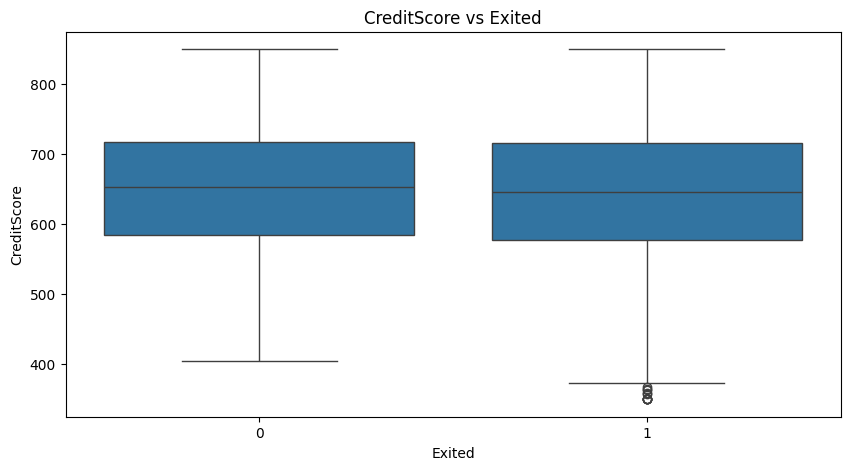

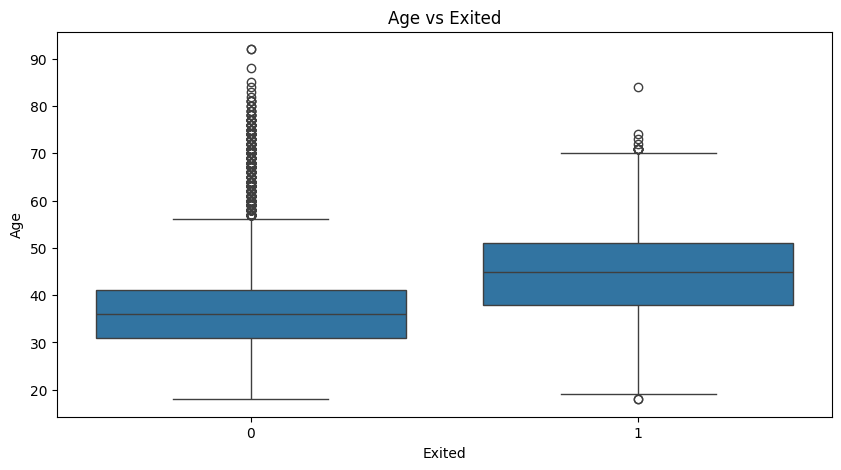

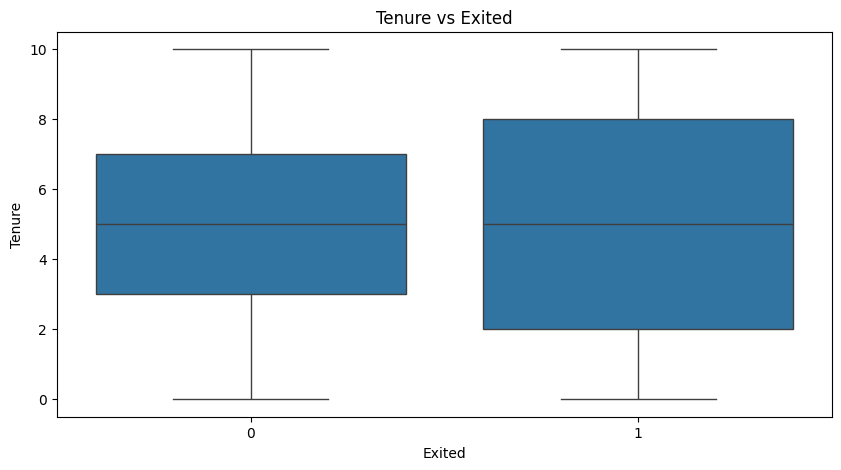

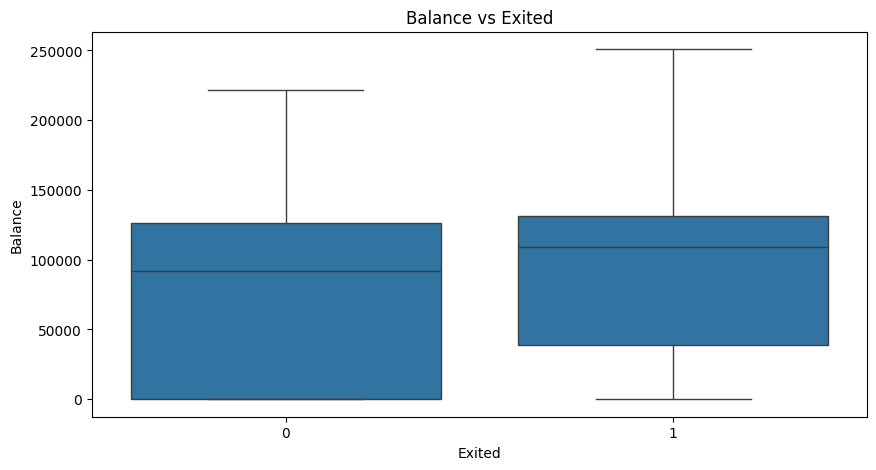

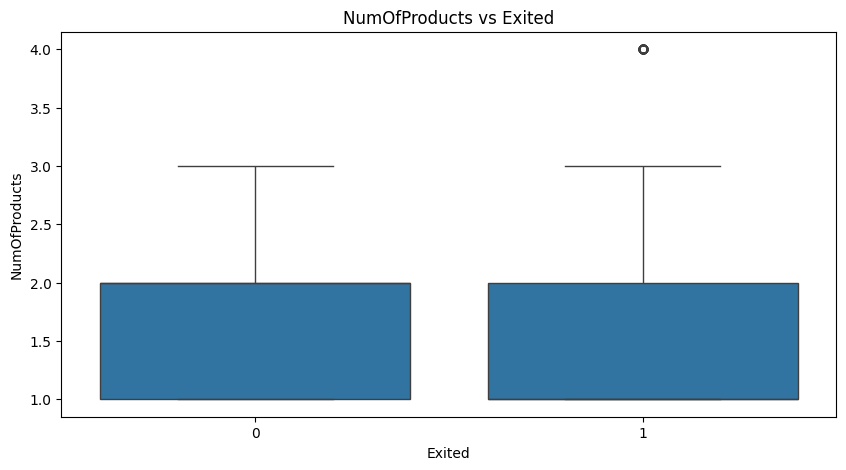

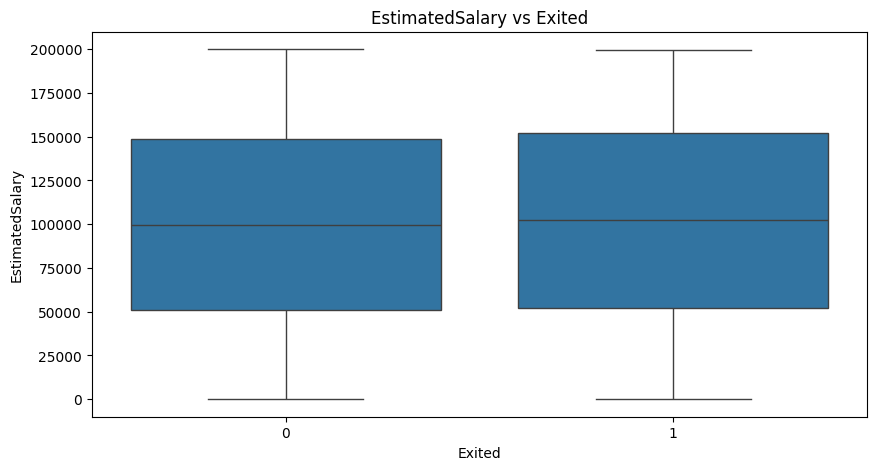

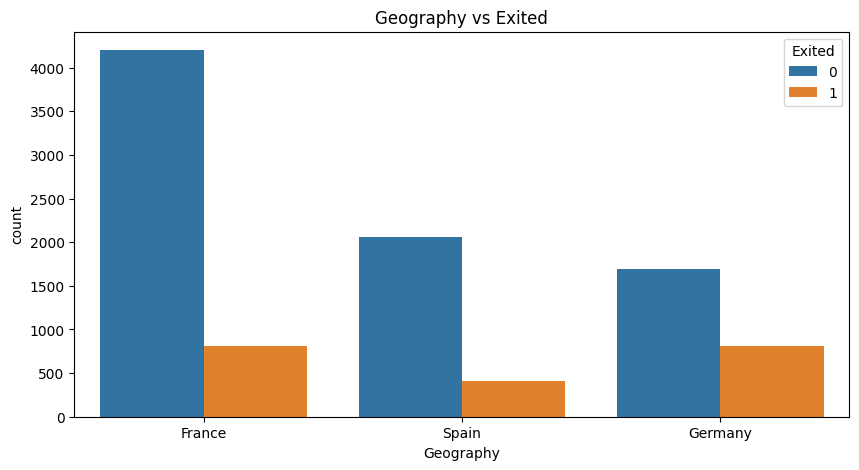

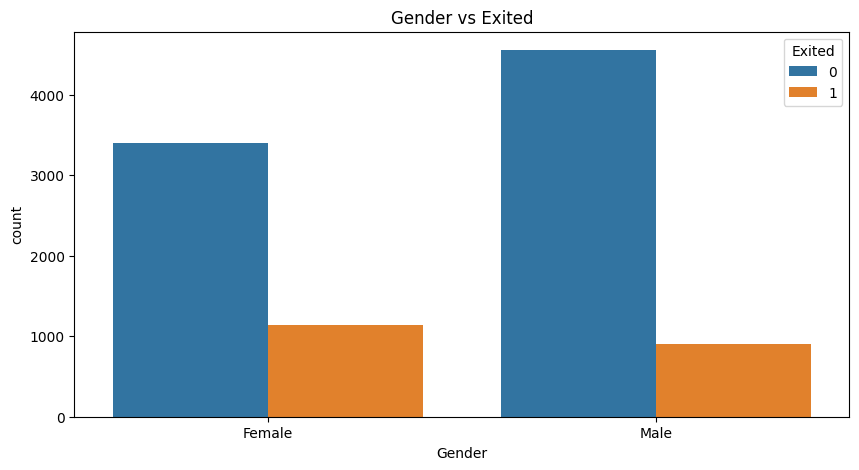

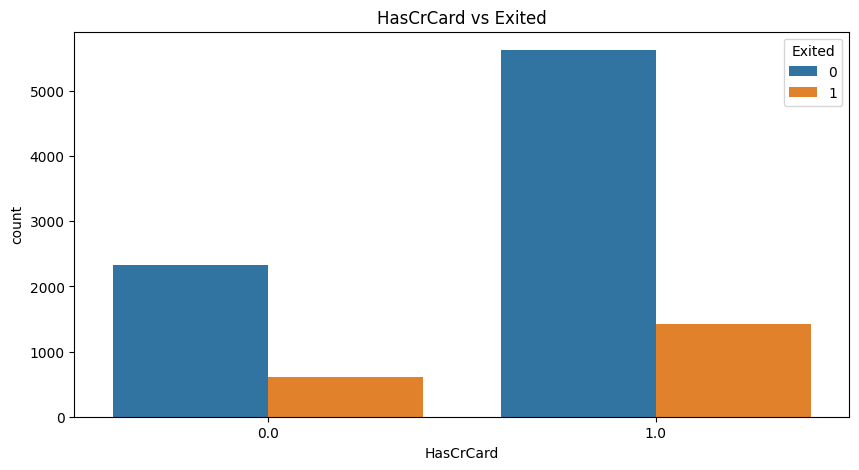

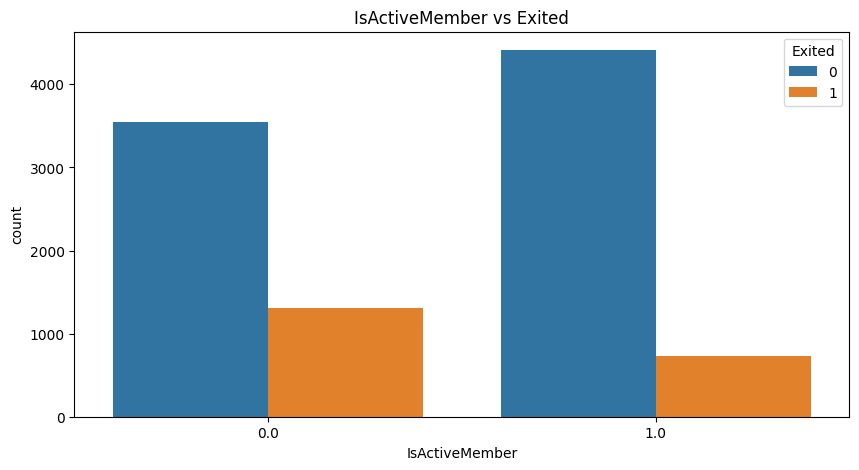

In [48]:
# Visualize relationships between features and target variable
for col in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='Exited', y=col, data=df)
    plt.title(f'{col} vs Exited')
    plt.show()

for col in categorical_features:
    if col != 'Exited':
        plt.figure(figsize=(10, 5))
        sns.countplot(x=col, hue='Exited', data=df)
        plt.title(f'{col} vs Exited')
        plt.show()

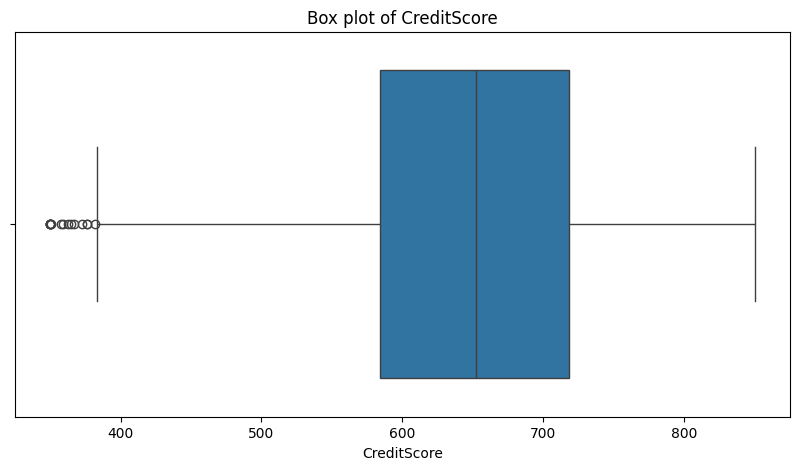

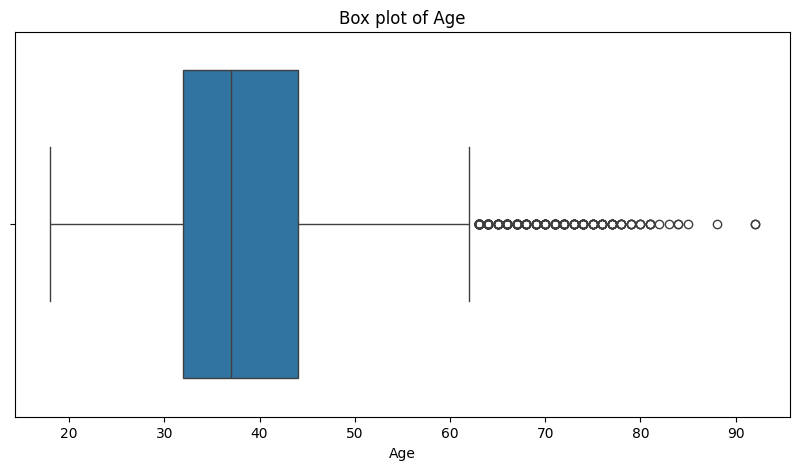

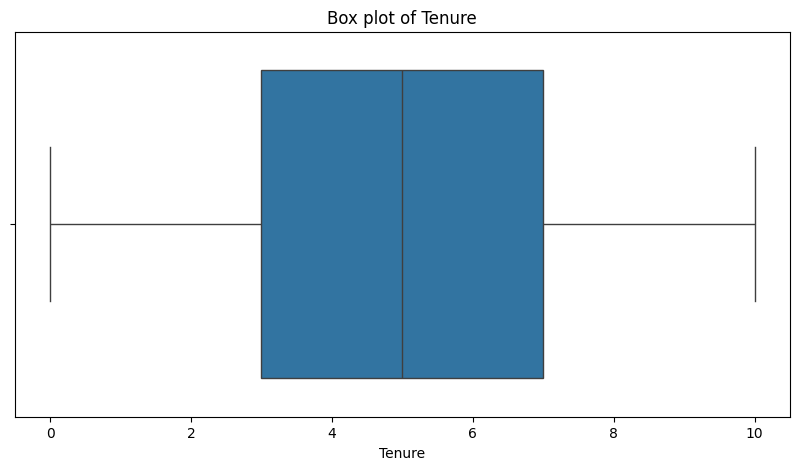

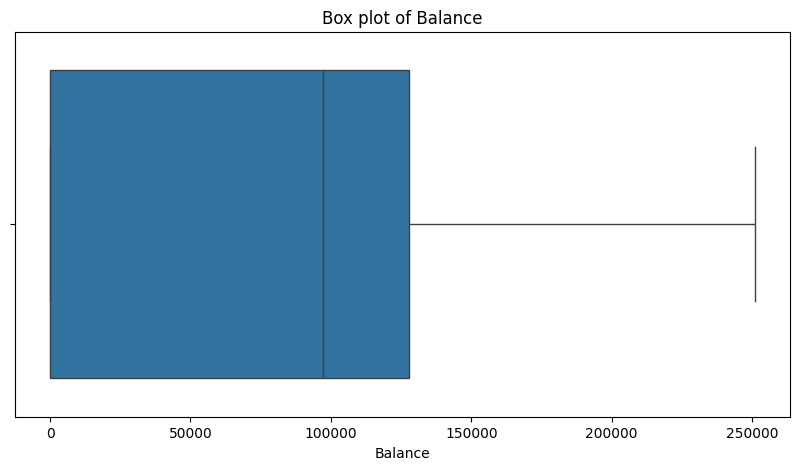

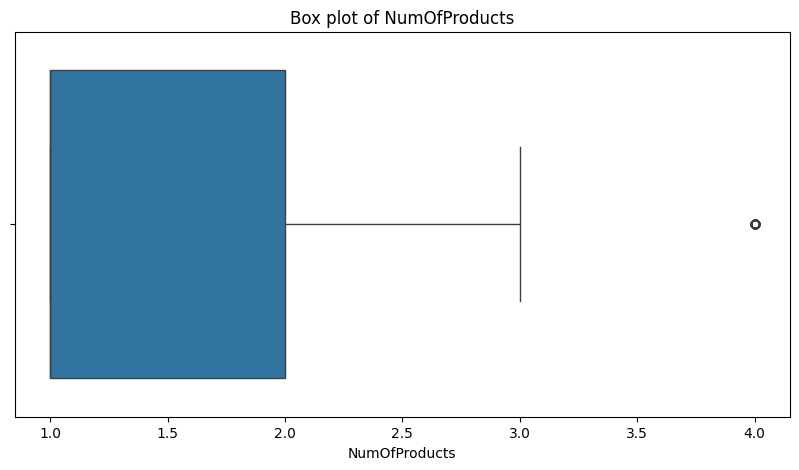

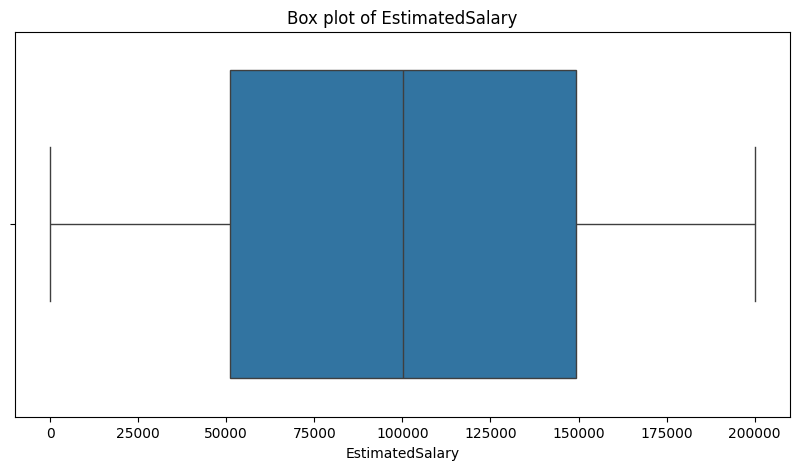

In [49]:

# Outlier detection and visualization
for col in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[col])
    plt.title(f'Box plot of {col}')
    plt.show()


In [50]:
# Removing outliers using IQR
Q1 = df[numerical_features].quantile(0.25)
Q3 = df[numerical_features].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[numerical_features] < (Q1 - 1.5 * IQR)) |(df[numerical_features] > (Q3 + 1.5 * IQR))).any(axis=1)]


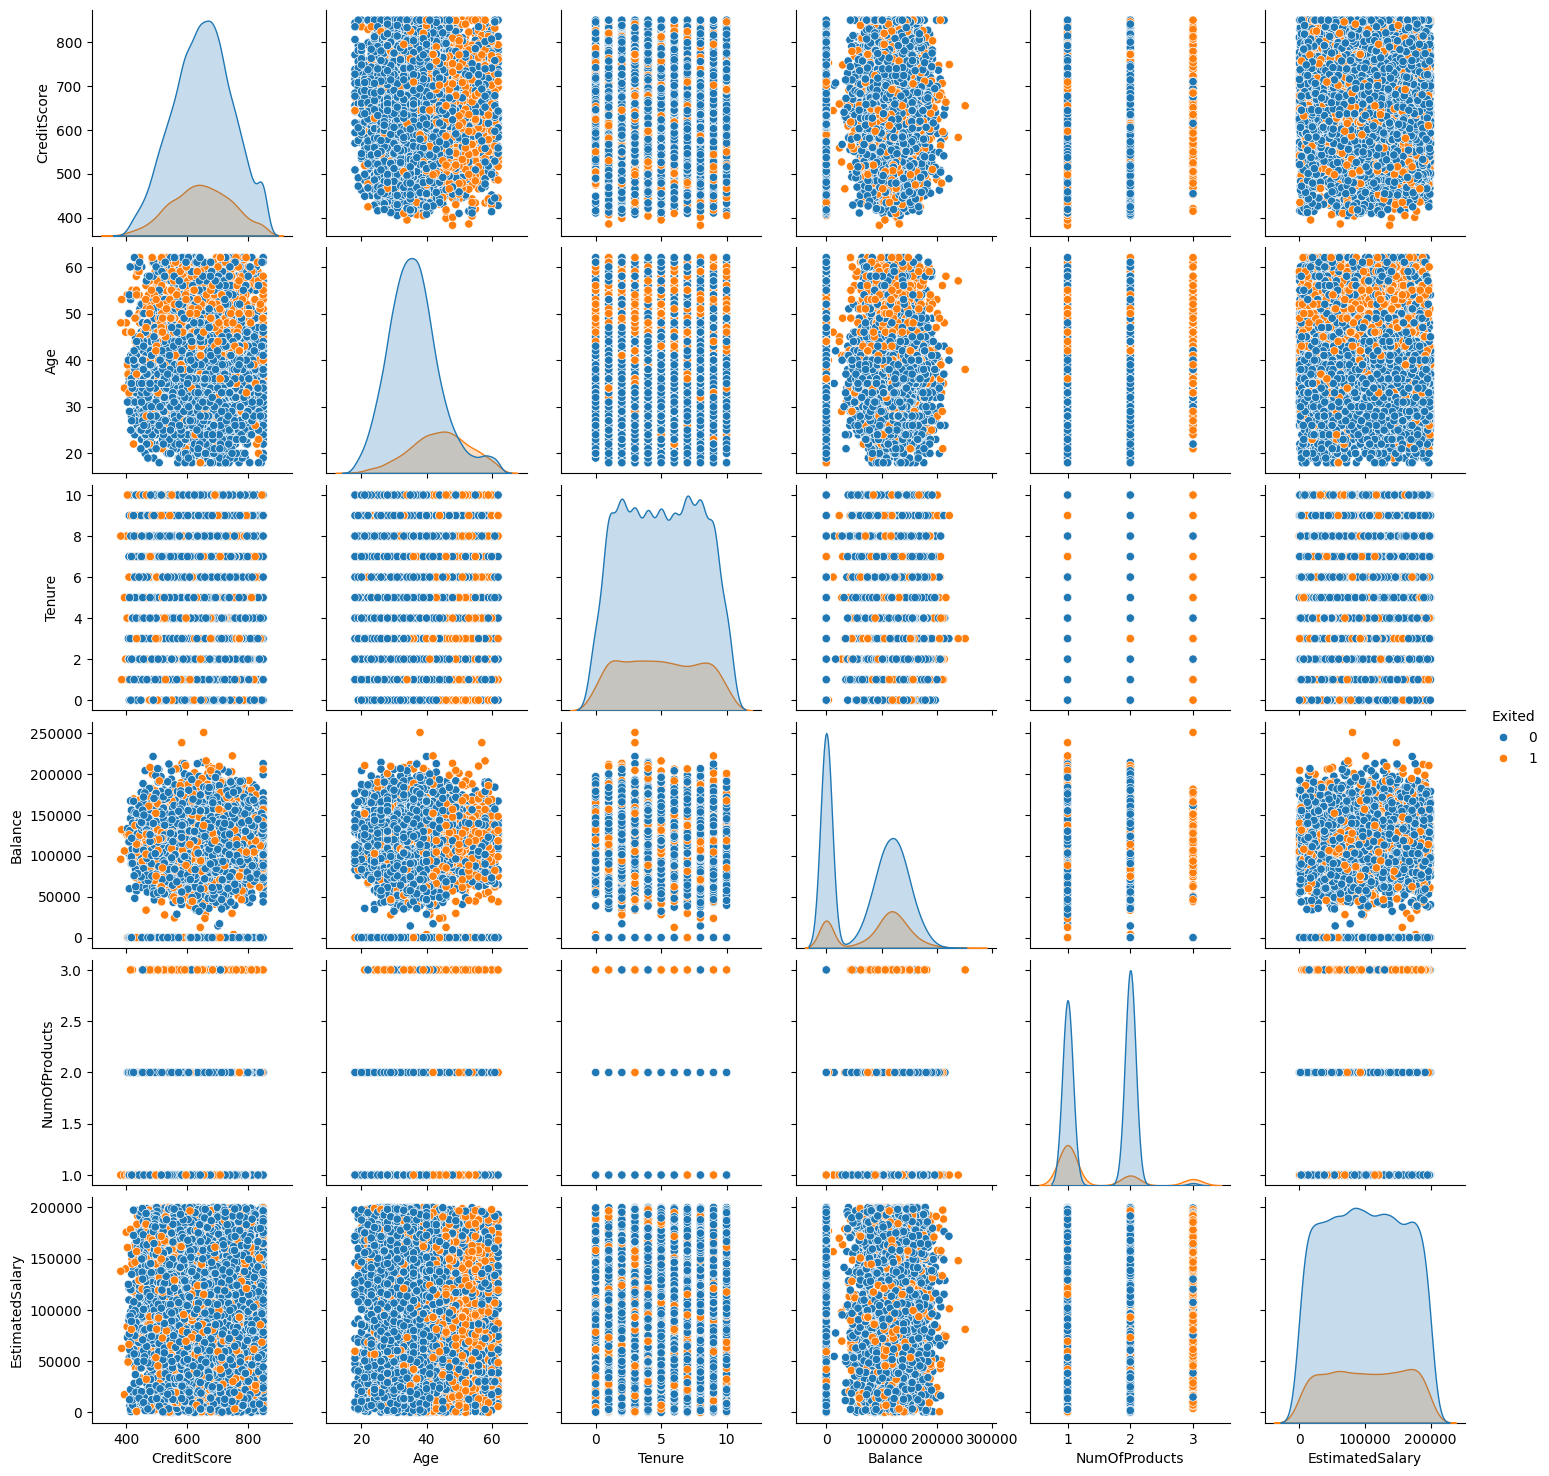

In [51]:
# Advanced visualizations
# Pair plot
sns.pairplot(df[numerical_features + ['Exited']], hue='Exited')
plt.show()


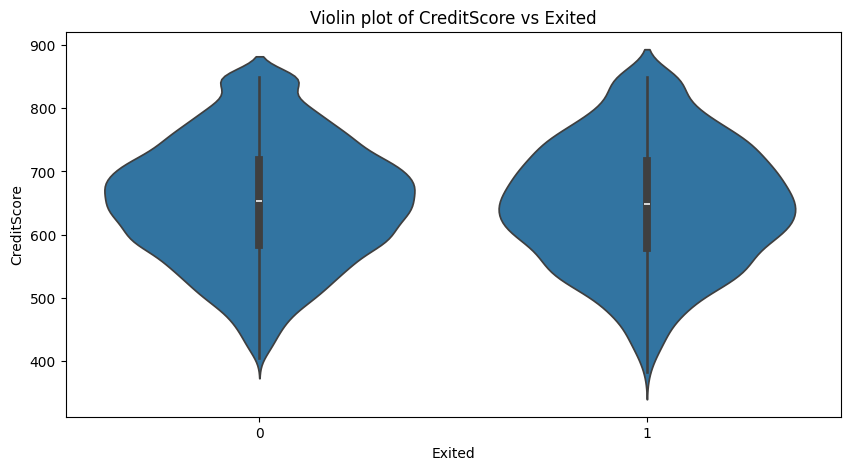

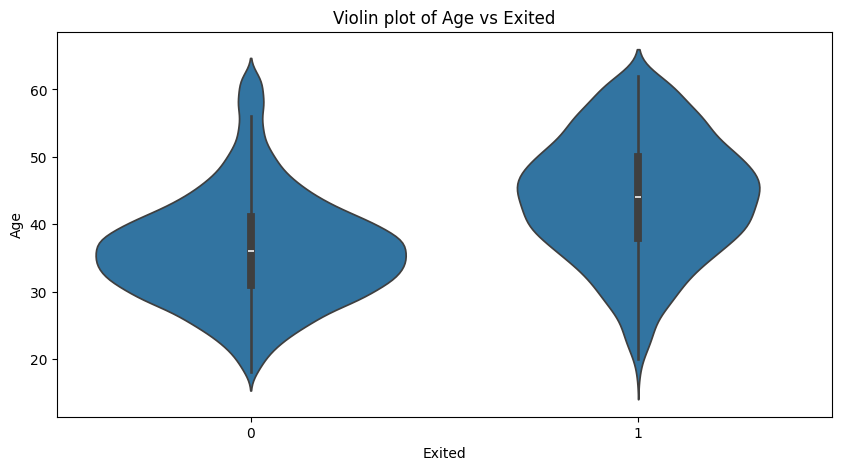

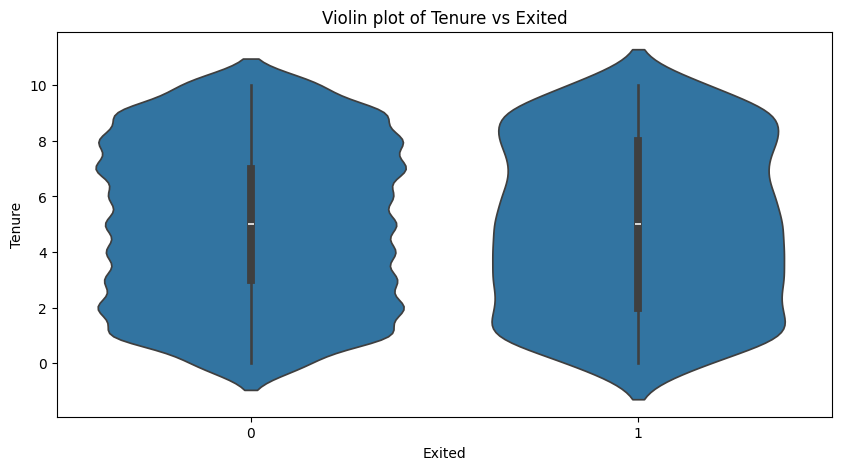

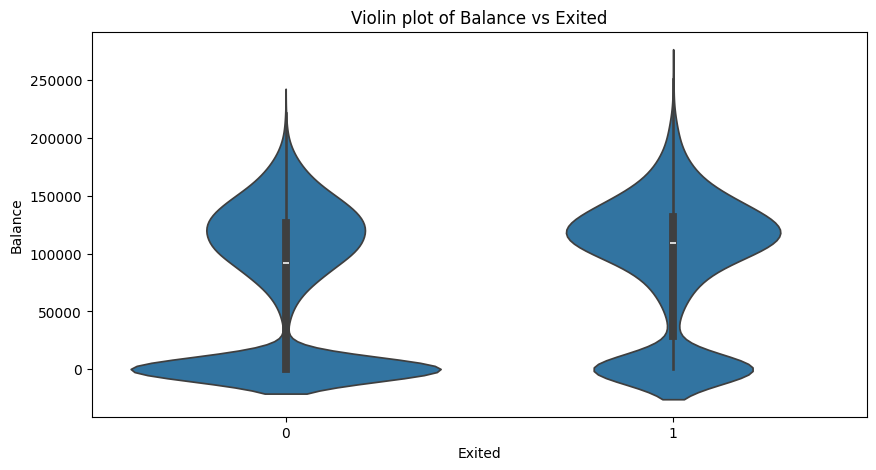

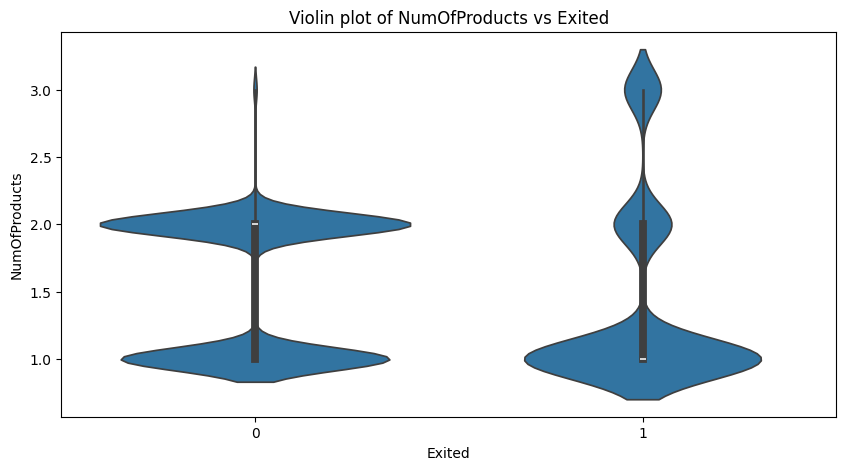

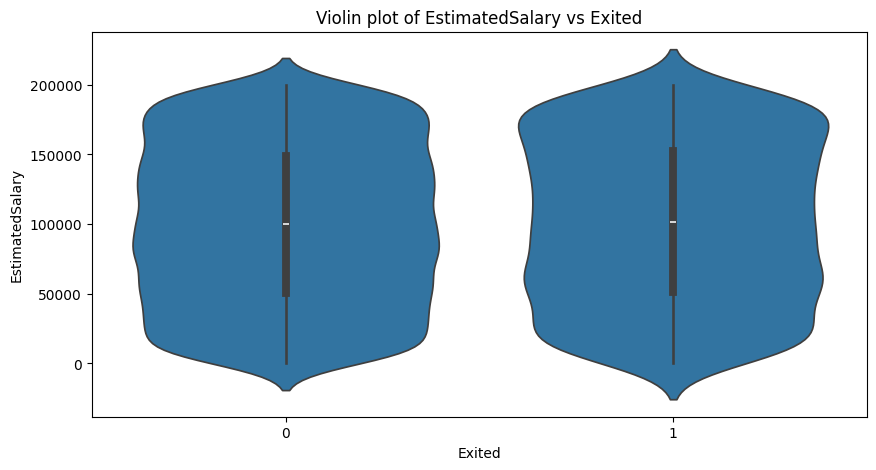

In [20]:
# Violin plot
for col in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.violinplot(x='Exited', y=col, data=df)
    plt.title(f'Violin plot of {col} vs Exited')
    plt.show()


<ipython-input-21-1f6086a4947d>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Exited'] == 0][col], label='Not Exited', shade=True)
<ipython-input-21-1f6086a4947d>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Exited'] == 1][col], label='Exited', shade=True)


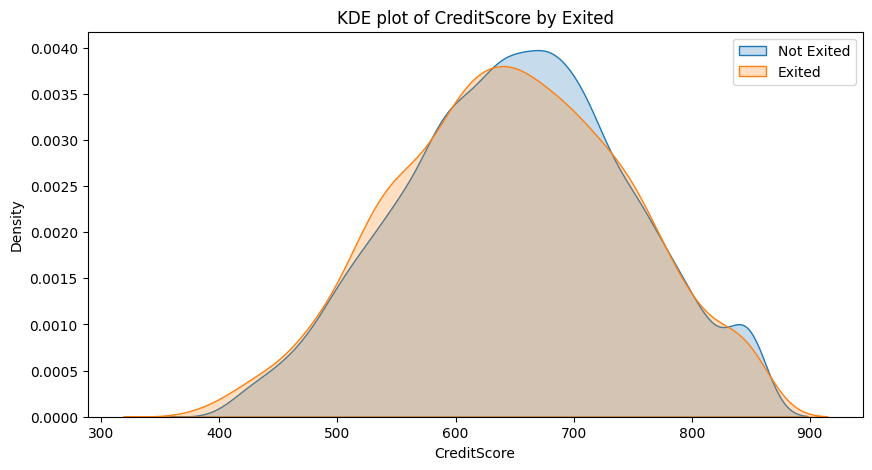

<ipython-input-21-1f6086a4947d>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Exited'] == 0][col], label='Not Exited', shade=True)
<ipython-input-21-1f6086a4947d>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Exited'] == 1][col], label='Exited', shade=True)


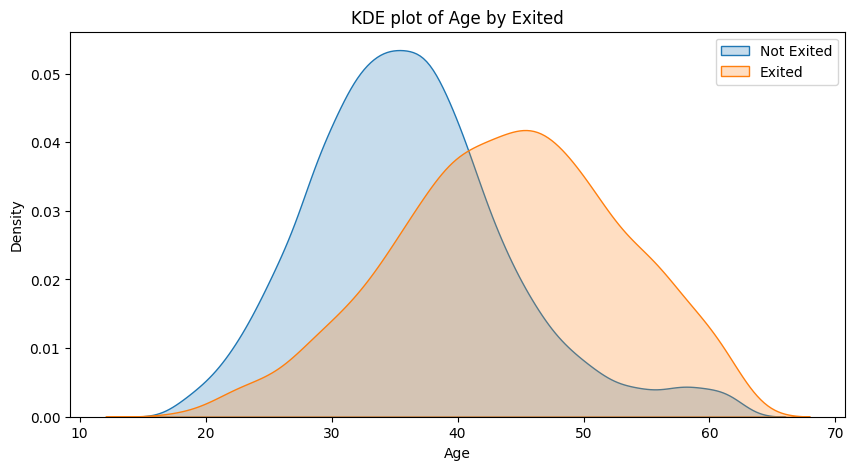

<ipython-input-21-1f6086a4947d>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Exited'] == 0][col], label='Not Exited', shade=True)
<ipython-input-21-1f6086a4947d>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Exited'] == 1][col], label='Exited', shade=True)


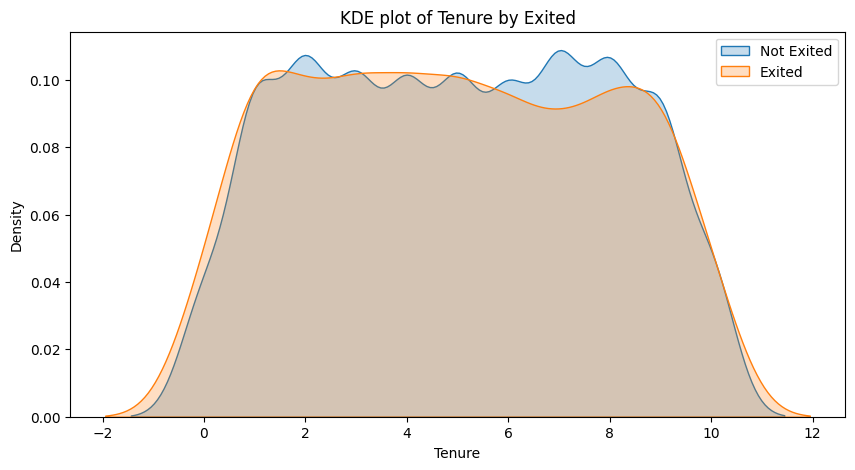

<ipython-input-21-1f6086a4947d>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Exited'] == 0][col], label='Not Exited', shade=True)
<ipython-input-21-1f6086a4947d>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Exited'] == 1][col], label='Exited', shade=True)


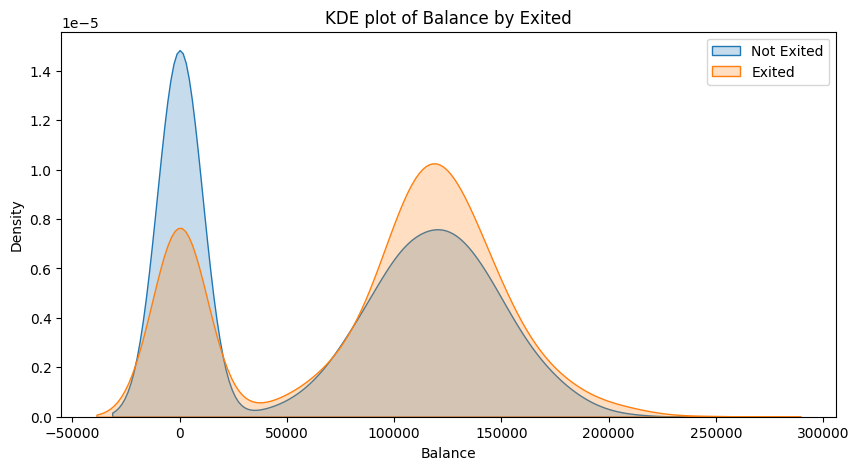

<ipython-input-21-1f6086a4947d>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Exited'] == 0][col], label='Not Exited', shade=True)
<ipython-input-21-1f6086a4947d>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Exited'] == 1][col], label='Exited', shade=True)


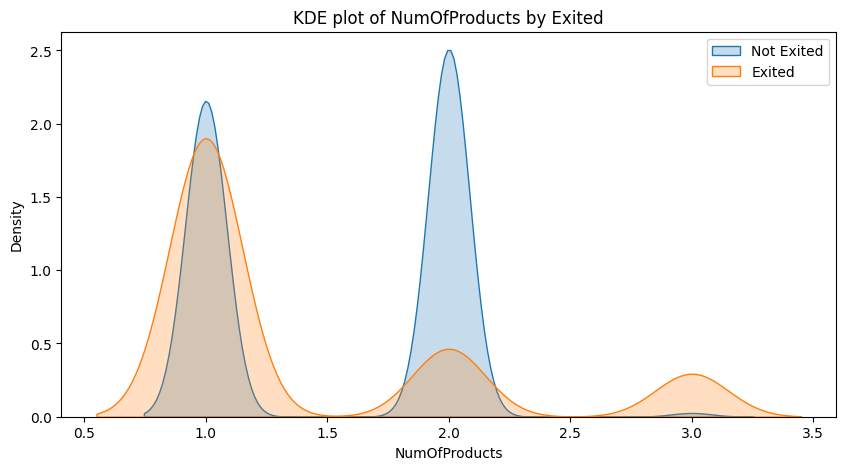

<ipython-input-21-1f6086a4947d>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Exited'] == 0][col], label='Not Exited', shade=True)
<ipython-input-21-1f6086a4947d>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Exited'] == 1][col], label='Exited', shade=True)


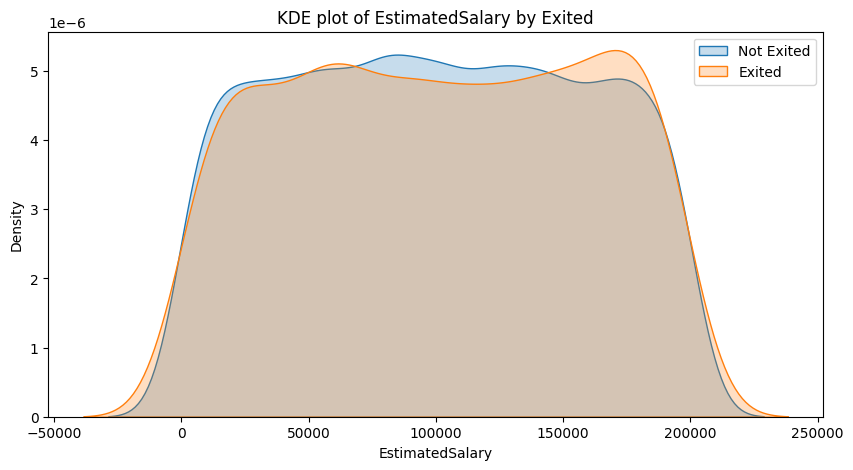

In [21]:

# KDE plot
for col in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.kdeplot(df[df['Exited'] == 0][col], label='Not Exited', shade=True)
    sns.kdeplot(df[df['Exited'] == 1][col], label='Exited', shade=True)
    plt.title(f'KDE plot of {col} by Exited')
    plt.legend()
    plt.show()

In [22]:
# Feature Engineering
df['AgeBalanceRatio'] = df['Age'] / (df['Balance'] + 1)  # Adding 1 to avoid division by zero
df['CreditAgeRatio'] = df['CreditScore'] / (df['Age'] + 1)


In [27]:
# Descriptive statistics
print("\nDescriptive statistics for numerical columns:")
print(df.describe())



Descriptive statistics for numerical columns:
          RowNumber    CustomerId  CreditScore          Age       Tenure  \
count   9566.000000  9.566000e+03  9566.000000  9566.000000  9566.000000   
mean    4999.008363  1.569094e+07   650.691616    37.733957     5.015576   
std     2888.005562  7.184545e+04    96.072052     8.782586     2.887844   
min        1.000000  1.556570e+07   383.000000    18.000000     0.000000   
25%     2492.250000  1.562852e+07   584.000000    32.000000     3.000000   
50%     5007.500000  1.569123e+07   652.000000    37.000000     5.000000   
75%     7493.750000  1.575296e+07   717.000000    43.000000     7.000000   
max    10000.000000  1.581569e+07   850.000000    62.000000    10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count    9566.000000    9566.000000  9566.000000     9566.000000   
mean    76429.447559       1.515994     0.705206        0.503345   
std     62411.783881       0.549776     0.455974        0.500015

In [28]:
# PCA for dimensionality reduction
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df[numerical_features])
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
df_pca['Exited'] = df['Exited']


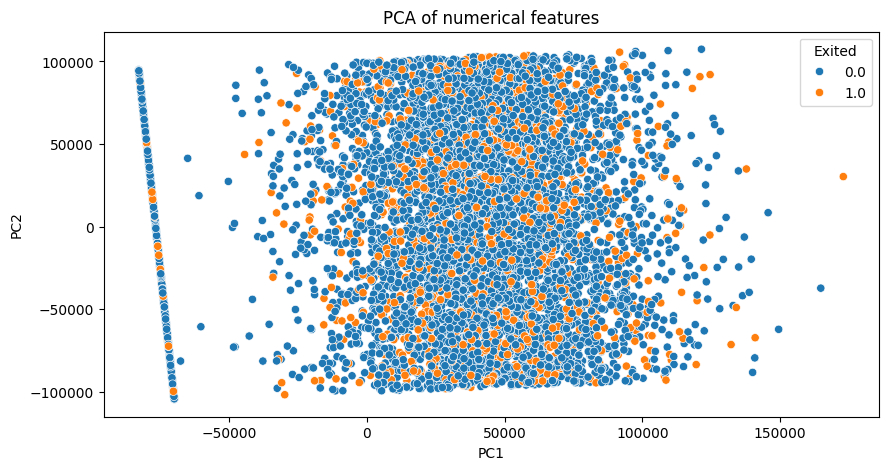

In [29]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='PC1', y='PC2', hue='Exited', data=df_pca)
plt.title('PCA of numerical features')
plt.show()


In [31]:
# drop the name.and country in the dataset
df = df.drop(['Surname', 'Geography'], axis=1)

# change the categorical data of gender to either one or zero
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})

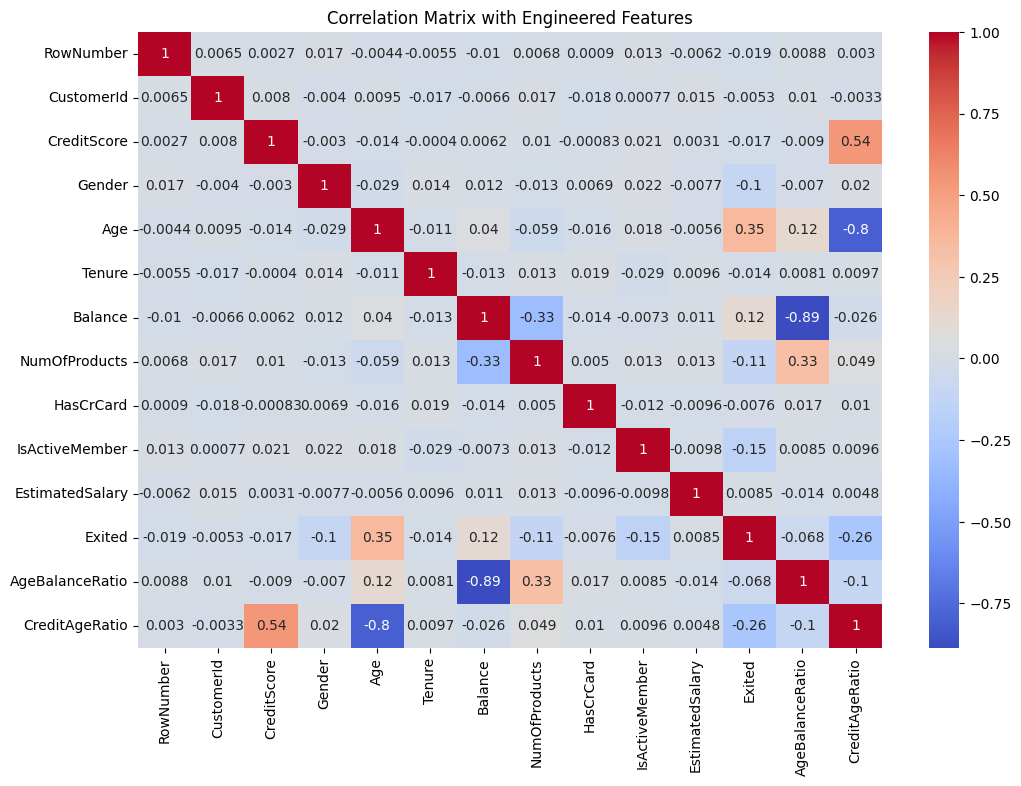

In [32]:
# Correlation matrix of new features
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix with Engineered Features')
plt.show()